In [1]:
!pip install transformers torch datasets scikit-learn bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 613.2 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 20.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 2.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.9/278.9 kB 2.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.3/411.3 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━

In [76]:
from datasets import load_dataset

data = load_dataset("jamescalam/reddit-python")
data=data["train"]

Repo card metadata block was not found. Setting CardData to empty.


In [77]:
data = data.filter(
    lambda x: True if len(x['selftext']) > 30 else 0
)

In [79]:
print(data)
for i in range(10):
    print(data["title"][i])


Dataset({
    features: ['sub', 'title', 'selftext', 'upvote_ratio', 'id', 'created_utc'],
    num_rows: 622
})
Flask -&gt; FastAPI
Making a list of advanced topics in Python
Port scanning with Python
Monday Daily Thread: Project ideas!
2-Button UI engine in MicroPython with "Apps" on a TTGO T-Display
Anyone know the history of why strings are iterable?
James Bond film details
Development of Desktop apps with Python
Weekly Code - Week 4: Digit Subtraction!
I made a game that let's you play any MIDI file with arrow keys!


In [80]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)


In [82]:
text = data["selftext"]


In [83]:
topics, probs = model.fit_transform(text)

2024-08-02 13:40:49,750 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

2024-08-02 13:40:54,988 - BERTopic - Embedding - Completed ✓
2024-08-02 13:40:54,989 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-02 13:40:56,747 - BERTopic - Dimensionality - Completed ✓
2024-08-02 13:40:56,748 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-02 13:40:56,773 - BERTopic - Cluster - Completed ✓
2024-08-02 13:40:56,774 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-02 13:40:56,880 - BERTopic - Representation - Completed ✓


In [84]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,272,-1_python_code_project_use,"[python, code, project, use, like, using, im, ...",[I would like to share a project with you that...
1,0,52,0_python_learning_programming_just,"[python, learning, programming, just, course, ...",[Discussion of using Python in a professional ...
2,1,39,1_link_title_thumbnail_json,"[link, title, thumbnail, json, email, datepubl...","[Hey guys, just in case anyone wants to scrape..."
3,2,31,2_package_python_like_import,"[package, python, like, import, use, run, comm...",[I already know this inherently sounds like a ...
4,3,30,3_make_project ideas_ideas_python,"[make, project ideas, ideas, python, project, ...",[Comment any project ideas beginner or advance...
5,4,27,4_quantum_sequence_digit_pi,"[quantum, sequence, digit, pi, digit sequence,...",[ from random import randint\n # create ...
6,5,22,5_ampx200b_link_lista_demo link,"[ampx200b, link, lista, demo link, tiles, 130,...",[Been working on this for a while. Hope this h...
7,6,21,6_questions_thread_response_python,"[questions, thread, response, python, ask, dis...",[Have some burning questions on advanced Pytho...
8,7,20,7_resource_python_related_use thread,"[resource, python, related, use thread, discus...",[Found a neat resource related to Python over ...
9,8,18,8_data_00 10_00_ai,"[data, 00 10, 00, ai, finance, 10, machine, ma...","[ Hey all,\n\nI love doing market research and..."


In [85]:

# Visualize topics
fig = model.visualize_topics()
fig.show()

# Visualize hierarchy
fig = model.visualize_hierarchy()
fig.show()

# Visualize barchart
fig = model.visualize_barchart()
fig.show()


In [86]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [87]:
#correct
from sentence_transformers import SentenceTransformer
import numpy as np

# Load the pre-trained model for text embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode the texts into embeddings
embeddings = model.encode(data['selftext'])

# Now embeddings can be used with UMAP
fit = umap.UMAP(n_components=3)
u = fit.fit_transform(embeddings)

In [90]:
import numpy as np
from tqdm.auto import tqdm

batch_size = 16
# Define n as the number of samples in your data
n = len(data)

embeds = np.zeros((n, model.get_sentence_embedding_dimension()))

for i in tqdm(range(0, n, batch_size)):
    i_end = min(i+batch_size, n)
    batch = data['selftext'][i:i_end]
    batch_embed = model.encode(batch)
    embeds[i:i_end,:] = batch_embed

  0%|          | 0/39 [00:00<?, ?it/s]

In [91]:
#correct
import umap

fit = umap.UMAP(n_components=3)  # by default this is 2
u = fit.fit_transform(embeddings)

In [92]:
import umap

fit = umap.UMAP(n_components=3)  # by default this is 2
u = fit.fit_transform(embeds)


In [70]:
import hdbscan

# Check the shape of the reduced data
print(u.shape)  # Should be (number_of_points, n_components)



(622, 3)


In [93]:
import hdbscan

clusterer = hdbscan.HDBSCAN()
clusterer.fit(u)

HDBSCAN()

<Axes: ylabel='$\\lambda$ value'>

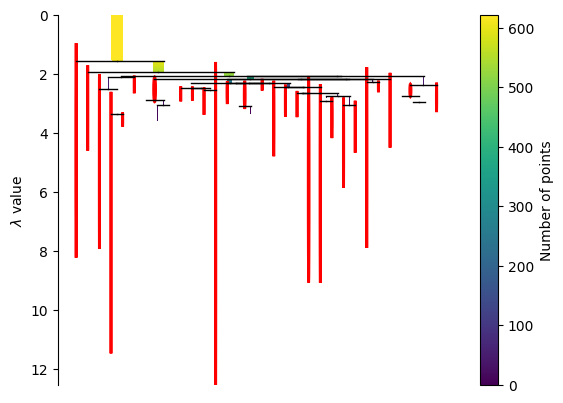

In [94]:

clusterer.condensed_tree_.plot(select_clusters=True)

<Axes: ylabel='$\\lambda$ value'>

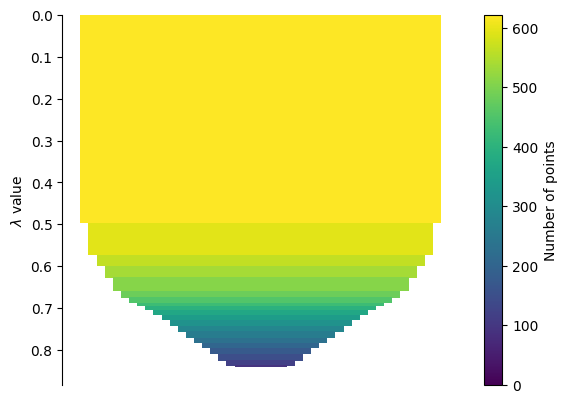

In [95]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=80)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

<Axes: ylabel='$\\lambda$ value'>

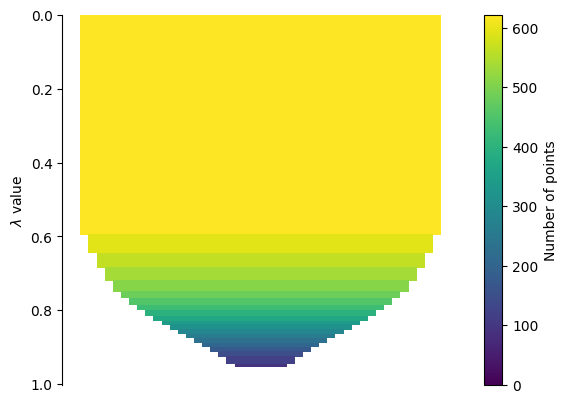

In [96]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=60)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

<Axes: ylabel='$\\lambda$ value'>

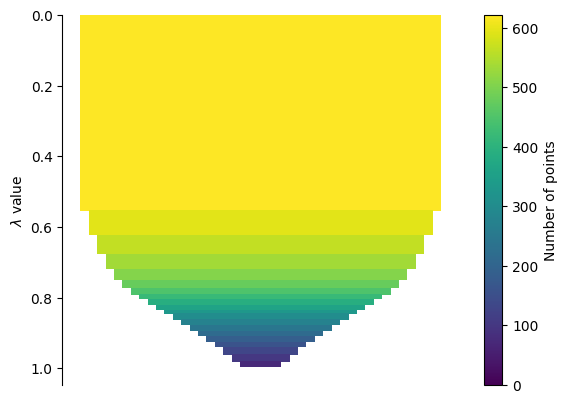

In [58]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=60)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

<Axes: ylabel='$\\lambda$ value'>

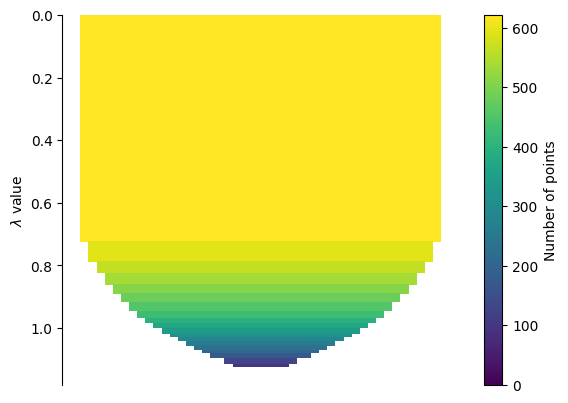

In [97]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=80, min_samples=40)
clusterer.fit(u)

clusterer.condensed_tree_.plot(select_clusters=True)

In [62]:
#topic extraction!!!!!
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [98]:
import nltk

# Download the stopwords resource
nltk.download('stopwords')

# Now you can use the stopwords
from nltk.corpus import stopwords

stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/e5028514/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [106]:
import re
#import nltk

# first lowercase and remove punctuation
alpha = re.compile(r'[^a-zA-Z ]+')
data = data.map(lambda x: {
    'tokens': alpha.sub('', x['selftext']).lower()
})
# tokenize, separating by whitespace
data = data.map(lambda x: {
    'tokens': nltk.tokenize.wordpunct_tokenize(x['tokens'])
})

# remove stopwords
stopwords = set(nltk.corpus.stopwords.words('english'))
# stopwords from nltk are all lowercase (so are our tokens)
data = data.map(lambda x: {
    'tokens': word for word in x['tokens'] if word not in stopwords
})

In [107]:
for i in range(i):
    print(data[i]['tokens'])

project
hackerank
herehttpssheldonbarrycomportscanningwithpython
work
app
objects
modetime
cheers
httpsoeisorgahttpsoeisorga
httpsgithubcomravenklsmidiarrowrushhttpsgithubcomravenklsmidiarrowrush
insightthanks
job
gitlabcomhttpsgitlabcomfragueconwayhttpsgitlabcomfragueconwayenjoy
selfhandleclient
appreciated
enjoy
herehttpswwwyoutubecomwatchvfvmanpnxihttpswwwyoutubecomwatchvfvmanpnxi
everyone
pagehttpspreviewredditbnjclgvpngwidthampformatpngampautowebpampsfdfaebcecbcffcdd
thank
addedampxbhttpspreviewredditpelxdvpngwidthampformatpngampautowebpampseefaccfedbbafaccahttpspreviewredditllglvxdvpngwidthampformatpngampautowebpampsbfcafdcecdbcbabdcebac
way
place
share
advance
another
aioethhttpspypiorgprojectaioeth
httpsgithubcomwbfacedetectionalgorithmscomparisonhttpsgithubcomwbfacedetectionalgorithmscomparison
demandhttpsgithubcomorsiniumlabsdeferredimport
httpswwwyoutubecomwatchvcaknqlcmiyihttpswwwyoutubecomwatchvcaknqlcmiyi
tunedthomas
something
thank
learn
google
thought
resources
operator

In [105]:
data[0]

{'sub': 'Python',
 'title': 'Flask -&gt; FastAPI',
 'selftext': "I'm happy with Flask and do not see the need to switch to FastAPI. Change my mind &amp; (ideally) point me to a nice tutorial that does just that in a demo project.",
 'upvote_ratio': 0.25,
 'id': 't3_ubiv0a',
 'created_utc': 1650885862.0,
 'tokens': ['im',
  'happy',
  'with',
  'flask',
  'and',
  'do',
  'not',
  'see',
  'the',
  'need',
  'to',
  'switch',
  'to',
  'fastapi',
  'change',
  'my',
  'mind',
  'amp',
  'ideally',
  'point',
  'me',
  'to',
  'a',
  'nice',
  'tutorial',
  'that',
  'does',
  'just',
  'that',
  'in',
  'a',
  'demo',
  'project']}

In [108]:
# add the cluster labels to our dataset
data = data.add_column('class', clusterer.labels_)

In [109]:
classes = {label: {'tokens': []} for label in set(clusterer.labels_)}
# add tokenized sentences to respective class
for row in data:
    classes[row['class']]['tokens'].extend(row['tokens'])

In [113]:
data

Dataset({
    features: ['sub', 'title', 'selftext', 'upvote_ratio', 'id', 'created_utc', 'tokens', 'class'],
    num_rows: 622
})

In [114]:
# Extract all tokens from the dataset
all_tokens = []
for row in data:
    all_tokens.extend(row['tokens'])

# Create a vocabulary (set of unique tokens)
vocab = set(all_tokens)

# Convert vocab to a list for indexing
vocab = list(vocab)
vocab

['a',
 'g',
 'y',
 'q',
 'b',
 'k',
 'm',
 'j',
 'd',
 'f',
 'c',
 's',
 'z',
 'l',
 'i',
 'x',
 'v',
 'n',
 't',
 'w',
 'u',
 'h',
 'e',
 'o',
 'r',
 'p']

In [115]:
tf = np.zeros((len(classes.keys()), len(vocab)))

for c, _class in enumerate(classes.keys()):
    for t, term in enumerate(tqdm(vocab)):
        tf[c, t] = classes[_class]['tokens'].count(term)

  0%|          | 0/26 [00:00<?, ?it/s]

In [116]:
tf

array([[1390.,  603.,  380.,   76.,  620.,  242.,  923.,  121.,  783.,
         385.,  956., 1244.,   80.,  564., 1187.,  115.,  222.,  866.,
        2086.,  475.,  648.,  981., 1755., 1284., 1022., 1278.]])

In [118]:
 idf = np.zeros((1, len(vocab)))

# calculate average number of words per class
A = tf.sum() / tf.shape[0]

for t, term in enumerate(tqdm(vocab)):
    # frequency of term t across all classes
    f_t = tf[:,t].sum()
    # calculate IDF
    idf_score = np.log(1 + (A / f_t))
    idf[0, t] = idf_score

idf

  0%|          | 0/26 [00:00<?, ?it/s]

array([[2.74690191, 3.54506079, 3.99607386, 5.59069236, 3.518072  ,
        4.44060736, 3.13455166, 5.12784271, 3.29242535, 3.9832437 ,
        3.10097772, 2.85111532, 5.53959549, 3.61005498, 2.89536722,
        5.17840707, 4.52589295, 3.19560483, 2.37256182, 3.7775167 ,
        3.47523921, 3.07633939, 2.5304355 , 2.82132326, 3.0373211 ,
        2.8257289 ]])

In [120]:
tf_idf = tf*idf
tf_idf

array([[3818.19365568, 2137.67165449, 1518.50806834,  424.89261916,
        2181.20464003, 1074.62698129, 2893.19118622,  620.46896823,
        2577.96904814, 1533.54882316, 2964.53470016, 3546.78745442,
         443.16763904, 2036.07100631, 3436.80088582,  595.51681304,
        1004.74823513, 2767.39378632, 4949.16395731, 1794.32043328,
        2251.95501071, 3017.88894645, 4440.91429967, 3622.57905959,
        3104.14216141, 3611.28153629]])

In [121]:
n = 5
top_idx = np.argpartition(tf_idf, -n)[:, -n:]
top_idx

array([[25, 22, 23, 18,  0]])

In [122]:
vlist = list(vocab)

for c, _class in enumerate(classes.keys()):
    topn_idx = top_idx[c, :]
    topn_terms = [vlist[idx] for idx in topn_idx]
    print(topn_terms)

['p', 'e', 'o', 't', 'a']


### end of classical topic modeling - BertTopic

In [136]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
umap_model = UMAP(n_neighbors=3, n_components=3, min_dist=0.05)
hdbscan_model = HDBSCAN(min_cluster_size=80, min_samples=40,
                        gen_min_span_tree=True,
                        prediction_data=True)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english')) + ['http', 'https', 'amp', 'com']

# we add this to remove stopwords that can pollute topcs
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

In [126]:
from bertopic import BERTopic

model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(data['selftext'])

2024-08-02 14:33:30,221 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

2024-08-02 14:33:32,747 - BERTopic - Embedding - Completed ✓
2024-08-02 14:33:32,747 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-02 14:33:33,856 - BERTopic - Dimensionality - Completed ✓
2024-08-02 14:33:33,857 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-02 14:33:33,879 - BERTopic - Cluster - Completed ✓
2024-08-02 14:33:33,881 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-02 14:33:33,995 - BERTopic - Representation - Completed ✓


In [130]:
for i in range(5):
    print(f"{topics[i]}: {data['title'][i]}")

-1: Flask -&gt; FastAPI
-1: Making a list of advanced topics in Python
-1: Port scanning with Python
-1: Monday Daily Thread: Project ideas!
-1: 2-Button UI engine in MicroPython with "Apps" on a TTGO T-Display


In [128]:
model.visualize_barchart()

ValueError: 
The 'rows' argument to make_subplots must be an int greater than 0.
    Received value of type <class 'int'>: 0

In [129]:
# Visualize topics
fig = model.visualize_topics()
fig.show()

# Visualize hierarchy
fig = model.visualize_hierarchy()
fig.show()

# Visualize barchart
fig = model.visualize_barchart()
fig.show()

IndexError: arrays used as indices must be of integer (or boolean) type

In [131]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stopwords = list(stopwords.words('english')) + ['http', 'https', 'amp', 'com']

embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
# we add this to remove stopwords that can pollute topcs
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words=stopwords)

model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)
#model.fit(data['selftext'])
topics, probs = model.fit_transform(data['selftext'])

2024-08-02 14:38:39,680 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/20 [00:00<?, ?it/s]

2024-08-02 14:38:42,128 - BERTopic - Embedding - Completed ✓
2024-08-02 14:38:42,129 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-08-02 14:38:43,261 - BERTopic - Dimensionality - Completed ✓
2024-08-02 14:38:43,262 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-08-02 14:38:43,275 - BERTopic - Cluster - Completed ✓
2024-08-02 14:38:43,277 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-08-02 14:38:43,388 - BERTopic - Representation - Completed ✓


In [135]:
data['selftext']

["I'm happy with Flask and do not see the need to switch to FastAPI. Change my mind &amp; (ideally) point me to a nice tutorial that does just that in a demo project.",
 "I'm preparing for a technical interview. I failed the first one a week ago. I noticed the excercises were tagged as (advanced python). 2 coding questions, one from decorators and the other from SQL.\n\nI'm taking a month to prepare for my second chance at it. And I'm making a list of advanced topics/concepts in python. I don't want to be taken by surprise again.\n\nList comprehension\n\nAnonymous function\n\nDecorators\n\nGenerators\n\nException handling\n\nInheritance\n\nEncapsulation\n\nUnit testing\n\nRegex\n\nI need suggestions just in case I'm missing anything. I do practice coding excercises on hackerank.",
 "Lately I've been learning a bit about communicating over a network with Python and thought it might be fun to create a simple TCP port scanner. Had a lot of fun playing around with this on my home network. 

In [134]:
topics

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,


In [132]:
model.visualize_barchart()

ValueError: 
The 'rows' argument to make_subplots must be an int greater than 0.
    Received value of type <class 'int'>: 0

In [133]:
if len(topics) > 0:
    model.visualize_barchart()
else:
    print("No topics found to visualize.")


ValueError: 
The 'rows' argument to make_subplots must be an int greater than 0.
    Received value of type <class 'int'>: 0